<a href="https://colab.research.google.com/github/zia207/Deep-Neural-Network-Satellite-Image-Classification-in-Google-Colaboratory-iPython-Note-Book-/blob/master/NoteBook/Machine_Learning/light_gbm_r.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Light Gradient Boosting Machine (LightGBM) in R

Zia Ahmed, University at Buffalo

LightGBM (Light Gradient Boosting Machine) is an open-source gradient boosting framework that is designed to be both efficient and scalable. It is based on the gradient boosting framework and uses a tree-based learning algorithm. LightGBM uses a novel technique called "Gradient-based One-Side Sampling" (GOSS) to achieve a faster and more accurate training process. It also uses a "Leaf-wise" strategy, which grows the tree by splitting the leaf that yields the maximum reduction in the loss function, resulting in a more balanced and less deep tree.

::: callout-note
Gradient-based One-Side Sampling" (GOSS):

Gradient-based One-Side Sampling (GOSS) is a data subsampling method used in LightGBM. GOSS is designed to speed up the training process of gradient boosting algorithms while maintaining or improving the model's accuracy.GOSS works by first sorting the training instances according to their gradients. The instances with larger gradients are considered more important for the model, as they provide more information about the loss function
:::

The key benefits of LightGBM are its speed, scalability, and accuracy. It can handle large-scale datasets with millions of samples and thousands of features, making it ideal for big data scenarios. It also has a smaller memory footprint compared to other gradient boosting algorithms, which makes it easier to train models on limited memory resources. It is designed to be distributed and efficient with the following advantages:

-   Faster training speed and higher efficiency.

-   Lower memory usage.

-   Better accuracy.

-   Support of parallel, distributed, and GPU learning.

-   Capable of handling large-scale data.

GBM (Gradient Boosting Machine) and LightGBM (Light Gradient Boosting Machine) are both gradient boosting algorithms used for supervised learning problems. While they share the same general approach to model training, there are several key differences between the two algorithms:

1.  Speed: LightGBM is generally faster than GBM. This is because it uses a more efficient algorithm for finding the best split points, and it employs parallel processing to speed up the training process.

2.  Memory Usage: LightGBM has a smaller memory footprint than GBM, which allows it to handle larger datasets with high-dimensional features.

3.  Categorical Features Handling: LightGBM has built-in support for handling categorical features, which can be a common feature type in real-world datasets. GBM does not have this feature.

4.  Leaf-wise Growth: LightGBM uses a "Leaf-wise" growth strategy, which grows the tree by splitting the leaf that yields the maximum reduction in the loss function, resulting in a more balanced and less deep tree. GBM uses a "Level-wise" growth strategy, which grows the tree level-by-level, resulting in a deeper and more unbalanced tree.

**Leaf-wise Growth**: "Leaf-wise" growth strategy is a tree building algorithm used in gradient boosting algorithms such as LightGBM. In this strategy, the tree is grown leaf-wise, meaning that it starts by growing the tree with a single root node, and then at each step, it selects the leaf node that yields the largest reduction in the loss function, and splits it into two child nodes

### Install Python Package rpy2

In [1]:
!pip uninstall rpy2 -y
!pip install rpy2==3.5.1
%load_ext rpy2.ipython

Found existing installation: rpy2 3.4.2
Uninstalling rpy2-3.4.2:
  Successfully uninstalled rpy2-3.4.2
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 201.7/201.7 kB 4.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for rpy2: filename=rpy2-3.5.1-cp310-cp310-linux_x86_64.whl size=314928 sha256=0ade5b37d7aecf1a2c98dccc2f17ce9fe4300c7df127630447f6ff414f6c9e70
  Stored in directory: /root/.cache/pip/wheels/73/a6/ff/4e75dd1ce1cfa2b9a670cbccf6a1e41c553199e9b25f05d953
Successfully built rpy2


### Mount Google Drive

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


### Installed required packages

In [ ]:
%%R
pkg <- c('tidyverse', 'tidymodels', 'caret', 'Metrics', 'ggpmisc', 'vip', 'patchwork','randomForest','ranger', 'lightgbm', 'fastDummies', 'bonsai')
new.packages <- pkg[!(pkg %in% installed.packages(lib='drive/My Drive/R/')[,"Package"])]
if(length(new.packages)) install.packages(new.packages, lib='drive/My Drive/R/')

### Load R Packages

In [6]:
%%R
# set library path
.libPaths('drive/My Drive/R')
library(tidyverse)
library(tidymodels)
library(caret)
library(ggpmisc)
library(vip)
library(patchwork)
library(lightgbm)
library(fastDummies)
library(bonsai)

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.2     ✔ readr     2.1.4
✔ forcats   1.0.0     ✔ stringr   1.5.0
✔ ggplot2   3.4.2     ✔ tibble    3.2.1
✔ lubridate 1.9.2     ✔ tidyr     1.3.0
✔ purrr     1.0.1     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors



✔ dials        1.2.0     ✔ tune         1.1.1
✔ infer        1.0.4     ✔ workflows    1.1.3
✔ modeldata    1.1.0     ✔ workflowsets 1.0.1
✔ parsnip      1.1.0     ✔ yardstick    1.2.0
✔ recipes      1.0.6     

✖ scales::discard() masks purrr::discard()
✖ dplyr::filter()   masks stats::filter()
✖ recipes::fixed()  masks stringr::fixed()
✖ dplyr::lag()      masks stats::lag()
✖ yardstick::spec() masks readr::spec()
✖ recipes::step()   masks stats::step()
• Use suppressPackageStartupMessages() to eliminate package startup messages


Attaching package: ‘caret’



    precision, recall, sensitivity, specificity



    lift



Attaching package: ‘ggpp’



    annotate


  method                  from   
  as.character.polynomial polynom

Attaching package: ‘vip’



    vi



Attaching package: ‘lightgbm’



    slice







### Data

In this exercise we will use following data set and use DEM, MAP, MAT, NAVI, NLCD, NLCD, and FRG to fit LightGbm regression model.

In [7]:
%%R
# load data from github
urlfile = "https://github.com//zia207/r-colab/raw/main/Data/USA/gp_soil_data.csv"
mf<-read_csv(url(urlfile))
# Create a data-frame
df<-mf %>% dplyr::select(SOC, DEM, Slope, Aspect, TPI, KFactor, SiltClay, MAT, MAP,NDVI, NLCD, FRG)%>%
    glimpse()

Rows: 467 Columns: 19
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr  (4): STATE, COUNTY, NLCD, FRG
dbl (15): ID, FIPS, STATE_ID, Longitude, Latitude, SOC, DEM, Aspect, Slope, ...

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.
Rows: 467
Columns: 12
$ SOC      <dbl> 15.763, 15.883, 18.142, 10.745, 10.479, 16.987, 24.954, 6.288…
$ DEM      <dbl> 2229.079, 1889.400, 2423.048, 2484.283, 2396.195, 2360.573, 2…
$ Slope    <dbl> 5.6716146, 8.9138117, 4.7748051, 7.1218114, 7.9498644, 9.6632…
$ Aspect   <dbl> 159.1877, 156.8786, 168.6124, 198.3536, 201.3215, 208.9732, 2…
$ TPI      <dbl> -0.08572358, 4.55913162, 2.60588670, 5.14693117, 3.75570583, …
$ KFactor  <dbl> 0.31999999, 0.26121211, 0.21619999, 0.18166667, 0.12551020, 0…
$ SiltClay <dbl> 64.84270, 72.00455, 57.18700, 54.99166, 51.22857, 45.02000, 5…
$ MAT      <dbl> 4.5951686, 3.

### Data Processing

In [8]:
%%R
tmp <- df[, c(11:12)]
# create dummy variables
tmp1 <- dummy_cols(tmp)
tmp1 <- tmp1[,3:12]

# create a dataframe
d <- data.frame(df[, c(1:10)], tmp1)
m <- as.matrix(d)

### Create training anddataset test

In [10]:
%%R
set.seed(123)
indices <- sample(1:nrow(df), size = 0.75 * nrow(df))
train <- m[indices,]
test <- m[-indices,]

### Load the train and test data into the LightGBM dataset object

In [11]:
%%R
y_train <- train[,1]
y_test <- test[,1]
train_lgb <- lgb.Dataset(train[,2:20],label=y_train)
test_lgb <- lgb.Dataset.create.valid(train_lgb,test[,2:20],label = y_test)

### Fit lightGBM model

Next, we'll fit the XGBoost model by using the lgb.train() function, which displays the training and testing RMSE (root mean squared error) for each round of boosting

In [ ]:
%%R
lightgbm_model <- lgb.train(
  params = list(
    objective = "regression",
    metric = "l2"
  ),
  data = train_lgb
)


### Prediction

In [13]:
%%R
yhat_fit_train <- predict(lightgbm_model,train[,2:20])
yhat_predict_test <- predict(lightgbm_model,test[,2:20])

In [14]:
%%R
rmse_train <- RMSE(y_train,yhat_fit_train)
rmse_train

[1] 1.667434


In [15]:
%%R
rmse_test <- RMSE(y_test,yhat_predict_test)
rmse_test

[1] 4.216184


## Tunning LightGBM with tidymodel

The tidymodels provides a comprehensive framework for building, tuning, and evaluating LightGBM model while following the principles of the tidyverse.

### Load data and Preprocessing


In [24]:
%%R
# load data
urlfile = "https://github.com//zia207/r-colab/raw/main/Data/USA/gp_soil_data.csv"
mf<-read_csv(url(urlfile))
# Create a data-frame
df<-mf %>% dplyr::select(SOC, DEM, Slope, Aspect, TPI, KFactor, SiltClay, MAT, MAP,NDVI, NLCD, FRG)
# convrt factor
df$NLCD <- as.factor(df$NLCD)
df$FRG <- as.factor(df$FRG)
# Split data
set.seed(1245)   # for reproducibility
split <- initial_split(df, prop = 0.8, strata = SOC)
train <- split %>% training()
test <-  split %>% testing()
# Set 10 fold cross-validation data set
cv_folds <- vfold_cv(train, v = 5)

Rows: 467 Columns: 19
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr  (4): STATE, COUNTY, NLCD, FRG
dbl (15): ID, FIPS, STATE_ID, Longitude, Latitude, SOC, DEM, Aspect, Slope, ...

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


### Create Recipe

A recipe is a description of the steps to be applied to a data set in order to prepare it for data analysis. Before training the model, we can use a recipe to do some pre-processing required by the model.

In [25]:
%%R
lightGBM_recipe <-
  recipe(SOC ~ ., data = train) %>%
  step_zv(all_predictors()) %>%
  step_dummy(all_nominal()) %>%
  step_normalize(all_numeric_predictors())

### Specify tunable Hypermeters of LightGBM

Parsnip could not support an implementation for `boost_tree` regression model specifications using the `lightgbm` engine. The parsnip extension package "bonsai" implements support for this specification. We need to install it and load to continue.

According to the lightgbm parameter tuning guide the hyperparameters number of leaves, min_data_in_leaf, and max_depth are the most important features. Currently implemented for lightgbm in (treesnip) are:

-   feature_fraction (mtry)

-   num_iterations (trees)

-   min_data_in_leaf (min_n)

-   max_depth (tree_depth)

-   learning_rate (learn_rate)

-   min_gain_to_split (loss_reduction)

-   bagging_fraction (sample_size)



In [26]:
%%R
lightgbm_model<-
  boost_tree(
    mtry = 5,
    trees = 100,
    min_n = tune(),
    tree_depth = tune(),
    loss_reduction = tune(),
    learn_rate = tune(),
    sample_size = 0.75
  ) %>%
  set_mode("regression") %>%
  set_engine("lightgbm")

lightgbm_model

Boosted Tree Model Specification (regression)

Main Arguments:
  mtry = 5
  trees = 100
  min_n = tune()
  tree_depth = tune()
  learn_rate = tune()
  loss_reduction = tune()
  sample_size = 0.75

Computational engine: lightgbm 



### Create Workflow

In [27]:
%%R
lightgbm_wf <- workflow() %>%
    add_model(lightgbm_model) %>%
    add_recipe(lightGBM_recipe)

lightgbm_wf


══ Workflow ════════════════════════════════════════════════════════════════════
Preprocessor: Recipe
Model: boost_tree()

── Preprocessor ────────────────────────────────────────────────────────────────
3 Recipe Steps

• step_zv()
• step_dummy()
• step_normalize()

── Model ───────────────────────────────────────────────────────────────────────
Boosted Tree Model Specification (regression)

Main Arguments:
  mtry = 5
  trees = 100
  min_n = tune()
  tree_depth = tune()
  learn_rate = tune()
  loss_reduction = tune()
  sample_size = 0.75

Computational engine: lightgbm 



### Define random grid prameters

In [28]:
%%R
lightgbm_grid <- parameters(lightgbm_model) %>%
    finalize(train) %>%
    grid_random(size = 20)
head(lightgbm_grid)

# A tibble: 6 × 4
  min_n tree_depth    learn_rate loss_reduction
  <int>      <int>         <dbl>          <dbl>
1     5          4 0.0498               1.71e-8
2     2         11 0.0000276            2.75e-7
3    39          9 0.000000453          3.09e-9
4    17         12 0.00000000325        1.71e-8
5    13          1 0.00000277           1.23e-8
6    28          9 0.0623               1.29e+1


### Tune grid

In [29]:
%%R
set.seed(345)
# grid search
lightgbm_tune_grid <- lightgbm_wf %>%
    tune_grid(
        resamples = cv_folds,
        grid = lightgbm_grid,
        control = control_grid(verbose = F),
        metrics = metric_set(rmse, rsq, mae)
    )

collect_metrics(lightgbm_tune_grid )

In [30]:
%%R
collect_metrics(lightgbm_tune_grid )

# A tibble: 60 × 10
   min_n tree_depth    learn_rate loss_reduction .metric .estimator  mean     n
   <int>      <int>         <dbl>          <dbl> <chr>   <chr>      <dbl> <int>
 1     5          4 0.0498         0.0000000171  mae     standard   2.85      5
 2     5          4 0.0498         0.0000000171  rmse    standard   4.01      5
 3     5          4 0.0498         0.0000000171  rsq     standard   0.375     5
 4     2         11 0.0000276      0.000000275   mae     standard   3.80      5
 5     2         11 0.0000276      0.000000275   rmse    standard   5.00      5
 6     2         11 0.0000276      0.000000275   rsq     standard   0.380     5
 7    39          9 0.000000453    0.00000000309 mae     standard   3.80      5
 8    39          9 0.000000453    0.00000000309 rmse    standard   5.00      5
 9    39          9 0.000000453    0.00000000309 rsq     standard   0.364     5
10    17         12 0.00000000325  0.0000000171  mae     standard   3.80      5
# ℹ 50 more rows
# ℹ

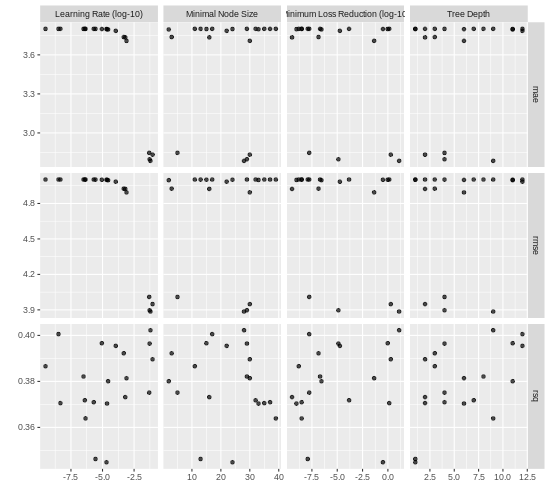

In [31]:
%%R -w 550 -h 500 -u px
autoplot(lightgbm_tune_grid)

### The best lightgbm

In [32]:
%%R
best_rmse <- select_best(lightgbm_tune_grid , "rmse")

lightgbm_final <- finalize_model(
  lightgbm_model,
  best_rmse
)

lightgbm_final

Boosted Tree Model Specification (regression)

Main Arguments:
  mtry = 5
  trees = 100
  min_n = 28
  tree_depth = 9
  learn_rate = 0.0623082219881162
  loss_reduction = 12.8917083526204
  sample_size = 0.75

Computational engine: lightgbm 



### Fit the model

We can either fit final_tree to training data using fit() or to the testing/training split using last_fit(), which will give us some other results along with the fitted output.

In [33]:
%%R
final_fit <- fit(lightgbm_final, SOC ~ .,train)

### Prediction

In [34]:
%%R
test$SOC.pred = predict(final_fit,test)

In [36]:
%%R
RMSE<- Metrics::rmse(test$SOC, test$SOC.pred$.pred)
RMSE

[1] 3.474282


### 1:1 Plot of Predicted vs Observed values

`geom_smooth()` using formula = 'y ~ x'


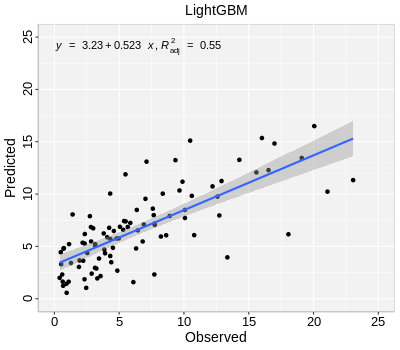

In [37]:
%%R -w 400 -h 350 -u px
formula<-y~x

ggplot(test, aes(SOC,SOC.pred$.pred)) +
  geom_point() +
  geom_smooth(method = "lm")+
  stat_poly_eq(use_label(c("eq", "adj.R2")), formula = formula) +
  ggtitle("LightGBM") +
  xlab("Observed") + ylab("Predicted") +
  scale_x_continuous(limits=c(0,25), breaks=seq(0, 25, 5))+
  scale_y_continuous(limits=c(0,25), breaks=seq(0, 25, 5)) +
  # Flip the bars
  theme(
    panel.background = element_rect(fill = "grey95",colour = "gray75",size = 0.5, linetype = "solid"),
    axis.line = element_line(colour = "grey"),
    plot.title = element_text(size = 14, hjust = 0.5),
    axis.title.x = element_text(size = 14),
    axis.title.y = element_text(size = 14),
    axis.text.x=element_text(size=13, colour="black"),
    axis.text.y=element_text(size=13,angle = 90,vjust = 0.5, hjust=0.5, colour='black'))

### Variable Importance

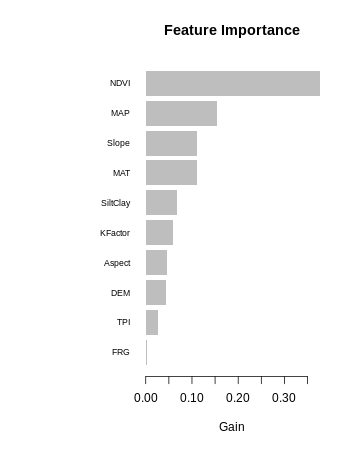

In [39]:
%%R -w 350 -h 450 -u px
extract_fit_engine(final_fit) %>%
  lightgbm::lgb.importance() %>%
  lightgbm::lgb.plot.importance(top_n = 10)

### Further Reading

1.  [R LightGBM Regression](https://www.r-bloggers.com/2022/07/r-lightgbm-regression/)

2.  [How to Use Lightgbm with Tidymodels](https://www.r-bloggers.com/2020/08/how-to-use-lightgbm-with-tidymodels/)

3.  [lightgbm with tidymodels](https://www.kaggle.com/code/athosdamiani/lightgbm-with-tidymodels)

### YouTube Video

1.  What is Light GBM and how does it compare against XGBoost?

{{< video https://www.youtube.com/watch?v=n_ZMQj09S6w >}}

Source: [DigitalSreeni](https://www.youtube.com/@DigitalSreeni)